In [1]:
import pickle
def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
data = load_obj("data")


In [2]:
data1 = load_obj("data1")

In [3]:
data2 = data+data1

In [4]:
data = data2
len(data)

714470

In [5]:
valid_data = []

count_nf = 0
count1_ns = 0
count = 0
arr = {}

for items in data:
    keys = items.keys()
    if 'link_flair_text' in keys and 'selftext' in keys:
        if items['link_flair_text'] != None and items['selftext'] !="" and items['author'] != '[deleted]' and items['selftext'] !="[removed]":
            valid_data.append(items)
            count  = count + 1
            
        
arr
count

65351

In [8]:
flairs = {}
for items in valid_data:
    if items['link_flair_text'] not in flairs.keys():
        flairs[items['link_flair_text']] = 0
    flairs[items['link_flair_text']] = flairs[items['link_flair_text']] + 1
flairs
len(flairs)

107

In [10]:
count_nf = 0
count_ns = 0
count = 0
arr = {}
count_na = 0
for items in data:
    keys = items.keys()
    count = count+1
    if 'link_flair_text' not in keys or items['link_flair_text']==None:
        count_nf = count_nf+1
    if 'selftext' not in keys or items['selftext']=="" or items['selftext']=="[removed]" :
        count_ns = count_ns+1
    if items['author'] == '[deleted]':
        count_na = count_na+1
        
            
        
count_ns

588666

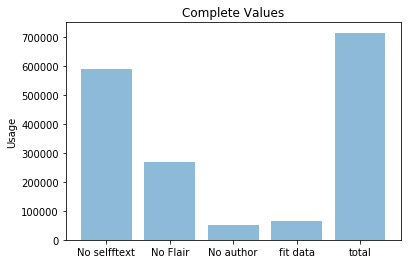

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
objects = ('No selfftext', 'No Flair', 'No author', 'fit data', 'total')
y_pos = np.arange(len(objects))
performance = [count_ns, count_nf,count_na, len(valid_data) ,len(data)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Complete Values')

plt.show()

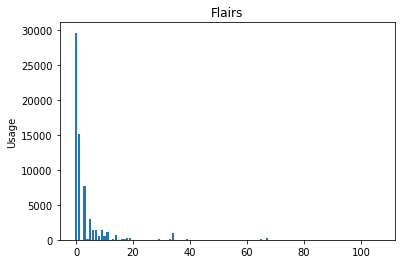

In [12]:
objects = flairs.keys()
y_pos = np.arange(len(objects))
performance = flairs.values()
plt.bar(y_pos, performance, align='center', alpha=1)
#plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Flairs')
plt.show()

In [13]:
rel_flairs = {}
for  key  in flairs:
    if flairs[key]>50:
        rel_flairs[key] = flairs[key]
    

In [14]:
len(rel_flairs)

23

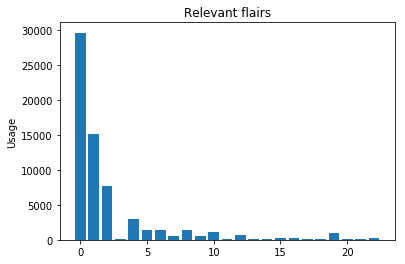

In [15]:
objects = rel_flairs.keys()
y_pos = np.arange(len(objects))
performance = rel_flairs.values()
plt.bar(y_pos, performance, align='center', alpha=1)
# plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Relevant flairs')
plt.show()

In [16]:
#we further narrow down our dataset and select posts by authors that have more than 5 submissions

rel_authors = [];
for item in sorted_authors:
    if item[1]<5:
        break
    rel_authors.append(item[0])
rel_authors

NameError: name 'sorted_authors' is not defined

In [21]:

good_data = []
for items in valid_data:
    if items['link_flair_text'] in rel_flairs.keys():
        good_data.append(items)
        
len(good_data)  

65118

In [22]:
authors = {}

for items in good_data:
    if items['author']  not in authors.keys():
        authors[items['author']] = {}
    if items['link_flair_text'] not in  authors[items['author']].keys():
            authors[items['author']][items['link_flair_text']] = 1
          
    else:
        authors[items['author']][items['link_flair_text']] =  authors[items['author']][items['link_flair_text']] + 1        

        
len(authors)


27186

In [24]:
author_freq = {}
for item in good_data:
    if item['author'] not in author_freq.keys():
        author_freq[item['author']] = 0;
    author_freq[item['author']] = author_freq[item['author']]+1
        
author_freq

{'Phenkoaway': 8,
 'forbesno1': 2,
 'aawaz-e-hind': 1,
 'ManicManicMan': 1,
 'gfnofxc22': 1,
 'Dragonlord_66': 3,
 'lionel_27': 6,
 'kwadd': 1,
 'TaylorKoleDOTcom': 1,
 'screenchecker': 19,
 'Not_a_kulcha': 7,
 'BlackBird3087': 4,
 'atifishere': 1,
 'antipositron': 8,
 'charavaka': 8,
 'memphis27': 3,
 'PM_ME_UR__BEEF': 3,
 'tysoncs': 2,
 'paradoxicalman17': 97,
 'MeManoos': 5,
 'PD_85': 3,
 '_RomanAbramovich': 1,
 'xthrowxawayx12': 1,
 'python00078': 10,
 'jammie_jammie_jammie': 1,
 'Bapu_Ji': 7,
 'IndianAntiFa': 6,
 'ghantesh': 6,
 'new_india': 2,
 'aaptard_': 8,
 'calvinamongsharks': 5,
 'pappa_indian': 8,
 'lifemoments': 29,
 'techaddict0099': 24,
 'ReeksOfChlorine': 1,
 'GeneralError': 13,
 'Zdraggonn': 3,
 'U_have_no_power_here': 1,
 'fucksteam1337': 7,
 'Yognan1': 32,
 'hashedout': 5,
 'jmathewww': 1,
 '_RandomRedditor': 105,
 'AppropriateMove': 1,
 'lonepairs': 5,
 'calls_spade_spade': 27,
 'Spiron123': 15,
 'INeedtoknowmore1989': 7,
 'jishnu7': 1,
 '-Kaptain-': 17,
 'sushane_1

In [25]:
rel_authors = {}
for author in author_freq:
    if author_freq[author] > 5:
        rel_authors[author] =  author_freq[author]
len(rel_authors)

2011

In [26]:
vgood_data = []
for items in good_data: 
    if items['author'] in rel_authors.keys():
        vgood_data.append(items)
len(vgood_data)

27191

In [27]:
_0_to_25 = 0
_25_to_50 = 0
_50_to_75= 0
_75_to_100  = 0

for author in rel_authors:
    
    
    if author_freq[author]>5:
        
        tot = 0
        for flair in authors[author]:
            tot = tot+authors[author][flair]
        maxi = 0
        for flair in authors[author]:
            authors[author][flair] =  authors[author][flair]/tot
            maxi = max(maxi, authors[author][flair])
        if(maxi<0.25):
            _0_to_25=_0_to_25+1
        elif maxi>0.25 and maxi<0.50:
            _25_to_50 = _25_to_50 +1
        elif maxi>0.50 and maxi<0.75:
            _50_to_75 = _50_to_75+1
        else:
            _75_to_100  = _75_to_100  +1
        
        
    
        
a = [_0_to_25 ,_25_to_50,_50_to_75, _75_to_100  ]
a

[7, 467, 712, 825]

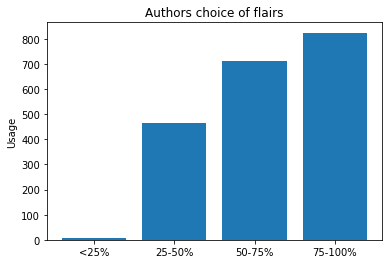

In [28]:
objects = ["<25%", "25-50%", "50-75%", "75-100%"]
y_pos = np.arange(len(objects))
performance = a
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)

plt.ylabel('Usage')
plt.title('Authors choice of flairs')
plt.show()

In [29]:
data = vgood_data

In [30]:
for items in data:
    items['percentage_contribution'] = authors[items['author']][items['link_flair_text']]

In [47]:
analysis_data = []
for items in data:
    temp = {}
    temp['author'] = items['author']
    temp['title'] = items['title']
    temp['selftext'] = items['selftext']
    temp['flair'] = items['link_flair_text']
    temp['is_adult'] = items['over_18']
    temp['author_bias'] = items['percentage_contribution']
    temp['score'] = items['score']
    analysis_data.append(temp)
len(analysis_data)

27191

In [35]:
score = {}

for items in data:
    if items['score']!=None:
        if items['link_flair_text'] not in score.keys():
            score[items['link_flair_text']] = [items['score'], items['score']]
            
        else:
            score[items['link_flair_text']][0] = max(items['score'], score[items['link_flair_text']][0])
            score[items['link_flair_text']][1] = min(items['score'], score[items['link_flair_text']][1])
            
score

{'AskIndia': [705, 0],
 'Politics': [10158, 0],
 'Non-Political': [3949, 0],
 '[R]eddiquette': [1800, 0],
 'Science/Technology': [331, 0],
 'Policy/Economy': [1346, 0],
 'Scheduled': [459, 0],
 'Business/Finance': [334, 0],
 'Sports': [1987, 0],
 'Demonetization': [672, 0],
 'Unverified': [1066, 0],
 'Food': [179, 0],
 'Policy': [699, 0],
 'AMA': [139, 0],
 'Science &amp; Technology': [517, 0],
 'Photography': [12, 0],
 'CAA-NRC': [1, 1],
 'Coronavirus': [134, 0],
 'Technology': [378, 0],
 'Policy &amp; Economy': [234, 0],
 'Entertainment': [1112, 0],
 'Askindia': [14, 0],
 'Casual': [45, 1]}

In [36]:
date = {}
ulmin = data[0]['retrieved_on']
ulmax = 0
for items in data:
    if items['retrieved_on']!=None:
        if items['link_flair_text'] not in date.keys():
            date[items['link_flair_text']] = [items['retrieved_on'], items['retrieved_on']]
            
        else:
            date[items['link_flair_text']][0] = max(items['retrieved_on'], date[items['link_flair_text']][0])
            date[items['link_flair_text']][1] = min(items['retrieved_on'], date[items['link_flair_text']][1])
       

In [37]:
x = np.arange(1451606400, 1586850954, 1000000)
y_corona = np.zeros(len(x))
y_askindia = np.zeros(len(x))
y_rediquette = np.zeros(len(x))
y_caa  =np.zeros(len(x))
y_science = np.zeros(len(x))
y_policy = np.zeros(len(x))

y_demonetization = np.zeros(len(x))


In [38]:
for items in data:
    
    if items['link_flair_text'] == 'Coronavirus':
        i = np.argmax(x>items['retrieved_on'])
        y_corona[i] = y_corona[i]+1
        
    if items['link_flair_text'] == 'AskIndia':
        i = np.argmax(x>items['retrieved_on'])
        y_askindia[i] = y_askindia[i]+1
        
    if items['link_flair_text'] == '[R]eddiquette':
        i = np.argmax(x>items['retrieved_on'])
        y_rediquette[i] =y_rediquette[i]+1
        
    if items['link_flair_text'] == 'CAA-NRC':
        i = np.argmax(x>items['retrieved_on'])
        y_caa[i] = y_caa[i]+1
        
    if items['link_flair_text'] == 'Science/Technology':
        i = np.argmax(x>items['retrieved_on'])
        y_science[i] = y_science[i]+1
        
        
    if items['link_flair_text'] == 'Policy/Economy':
        i = np.argmax(x>items['retrieved_on'])
        y_policy[i] = y_policy[i]+1
    
    if items['link_flair_text'] == 'Demonetization':
        i = np.argmax(x>items['retrieved_on'])
        y_demonetization[i] = y_demonetization[i]+1


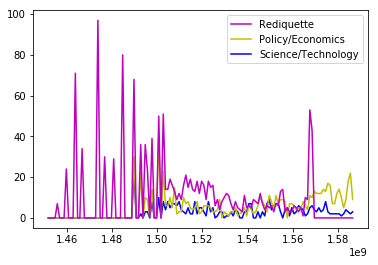

In [39]:
fig = plt.figure()
ax = plt.axes()


# plt.plot(x, y_corona , 'r', label='CoronaVirus')
plt.plot(x, y_science , 'b', label='Science/Technology')
plt.plot(x, y_policy , 'y', label='Policy/Economics')
# plt.plot(x, y_caa, 'k', label = 'CAA/NRC')
plt.plot(x, y_rediquette, 'm', label='Rediquette')
# plt.plot(x, y_askindia , 'c', label='AskIndia')
# plt.plot(x, y_demonetization, 'g', label='Demonetization')

handles, labels = ax.get_legend_handles_labels()

# reverse the order
ax.legend(handles[::-1], labels[::-1])

In [49]:
import pandas as pd
dataframe =pd.DataFrame(analysis_data)


<bound method NDFrame.head of                      author  author_bias               flair  is_adult  score  \
0                Phenkoaway     1.000000            AskIndia     False      0   
1                 lionel_27     0.833333            AskIndia     False      0   
2             screenchecker     0.105263            Politics     False     40   
3              Not_a_kulcha     0.714286            AskIndia     False      2   
4              antipositron     0.750000       Non-Political     False      0   
5                 charavaka     0.625000            Politics     False     13   
6          paradoxicalman17     0.979381            AskIndia     False     16   
7               python00078     0.800000            AskIndia     False      1   
8                   Bapu_Ji     0.714286            Politics     False    296   
9              IndianAntiFa     1.000000            Politics     False     22   
10                 ghantesh     0.500000            Politics     False     33  

In [50]:
dataframe.to_csv(r'flair_data.csv', index = False)

In [43]:
import csv

keys = data[0].keys()
with open('flair_data.csv', 'wb') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(data)

TypeError: a bytes-like object is required, not 'str'